# Experiment 15

###  Implement dimensionality reduction using PCA

First 5 Transformed Data are : 
 [[-2.26454173  0.5057039 ]
 [-2.0864255  -0.65540473]
 [-2.36795045 -0.31847731]
 [-2.30419716 -0.57536771]
 [-2.38877749  0.6747674 ]]
Original Shape    : (150, 4)
Transformed Shape : (150, 2)


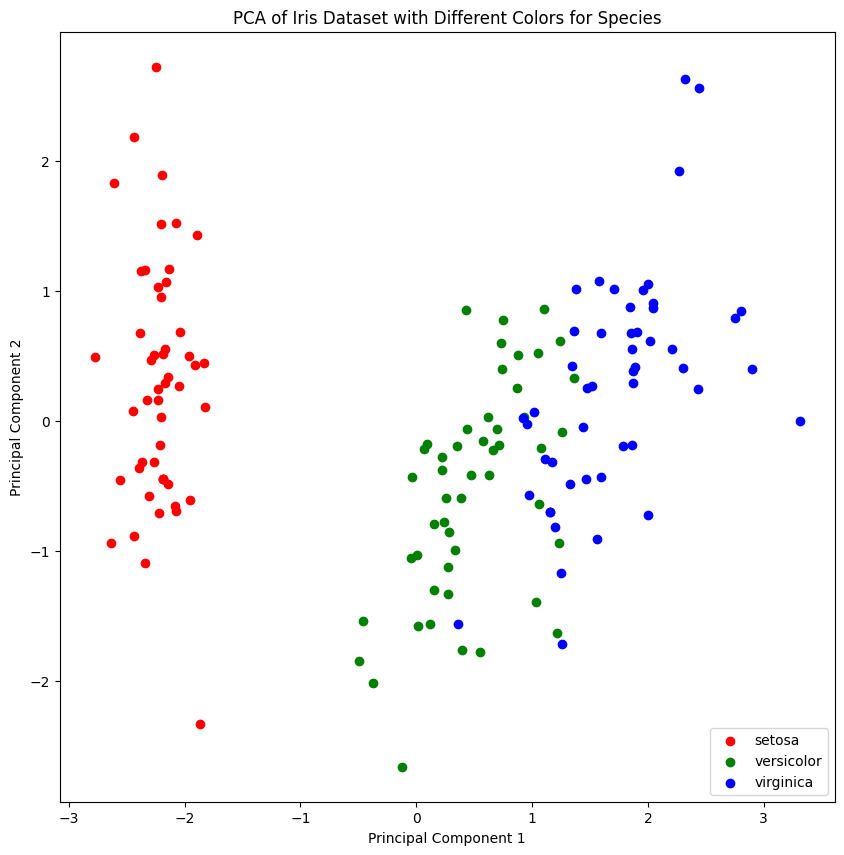

Explained variance by each component: [0.72770452 0.23030523]


In [24]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Iris_Dataset.csv')

# Separate features (x) and target (y)
x = df.iloc[:, :4] 

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA to reduce to 2 components
pca_model = PCA(n_components=2)
x_pca = pca_model.fit_transform(x_scaled)

# Print first 5 transformed rows
print('First 5 Transformed Data are : \n', x_pca[:5])

# Print original and transformed shapes
print(f'Original Shape    : {x.shape}')
print(f'Transformed Shape : {x_pca.shape}')

# Plotting PCA results with different colors for each species
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
plt.figure(figsize=(10, 10))

# Scatter plot with labels for species
for species in colors:
    indices = df['species'] == species
    plt.scatter(x_pca[indices, 0], x_pca[indices, 1], c=colors[species], label=species)

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset with Different Colors for Species')
plt.legend(loc="lower right")
plt.show()

explained_variance=pca_model.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

# Following are Additional Visualization Methods( Not Required in Experiment )

## Pair Plot (for PCA Components)

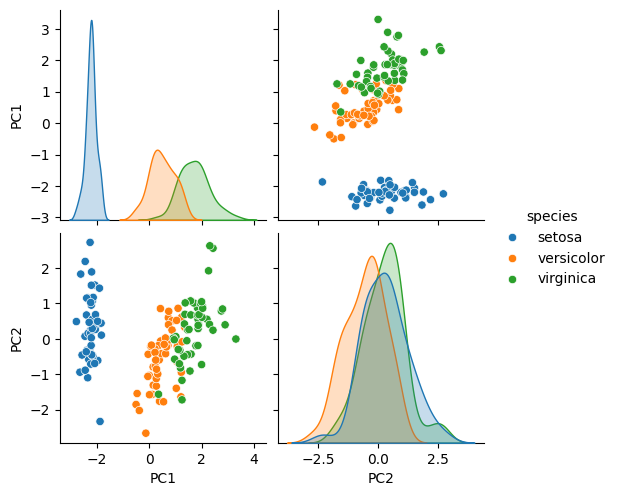

In [21]:
import seaborn as sns
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']
sns.pairplot(pca_df, hue='species', diag_kind='kde')


## 2D Density Plot

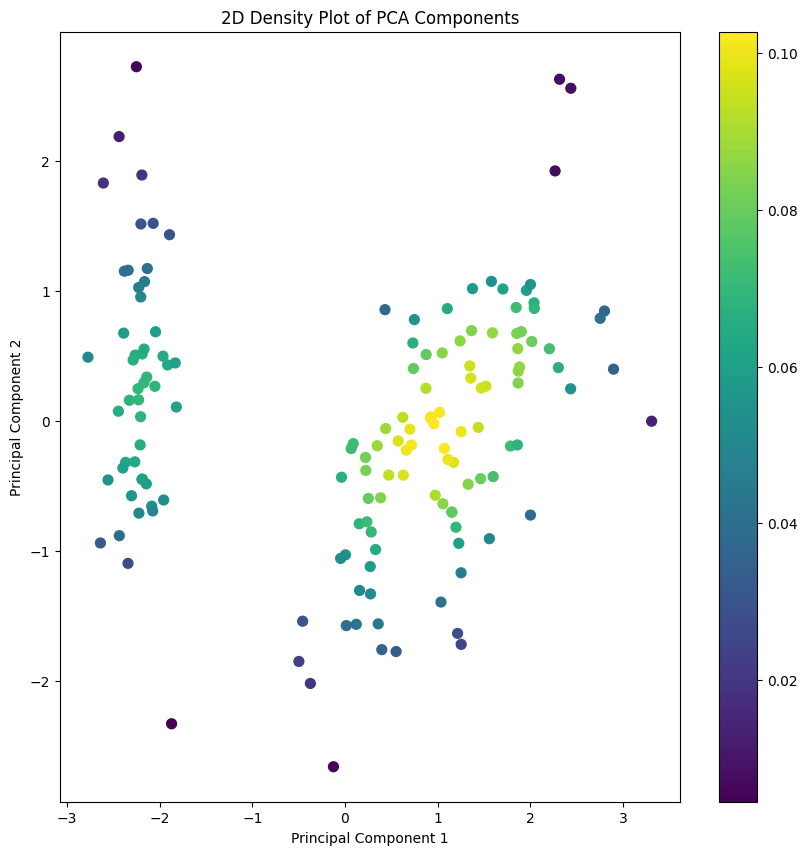

In [8]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([x_pca[:, 0], x_pca[:, 1]])
z = gaussian_kde(xy)(xy)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=z, s=50, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Density Plot of PCA Components')
plt.colorbar()
plt.show()


## 3D Scatter Plot (if you use 3 components in PCA)

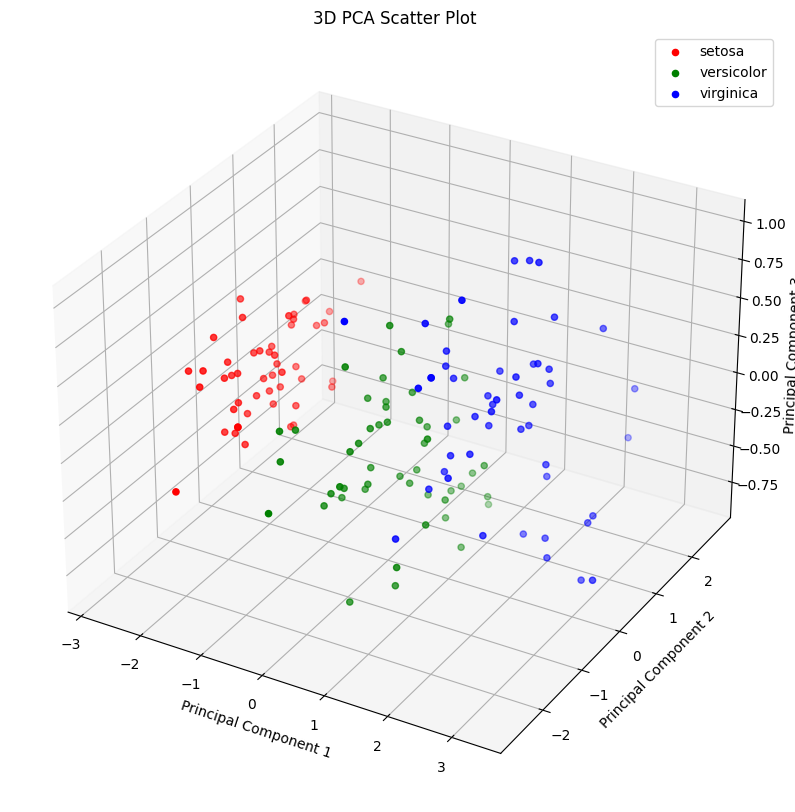

In [9]:
from mpl_toolkits.mplot3d import Axes3D

pca_model_3d = PCA(n_components=3)
x_pca_3d = pca_model_3d.fit_transform(x_scaled)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for species in colors:
    indices = df['species'] == species
    ax.scatter(x_pca_3d[indices, 0], x_pca_3d[indices, 1], x_pca_3d[indices, 2], 
               c=colors[species], label=species)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Scatter Plot')
plt.legend()
plt.show()

## Biplot (Scatter Plot with Loading Vectors)

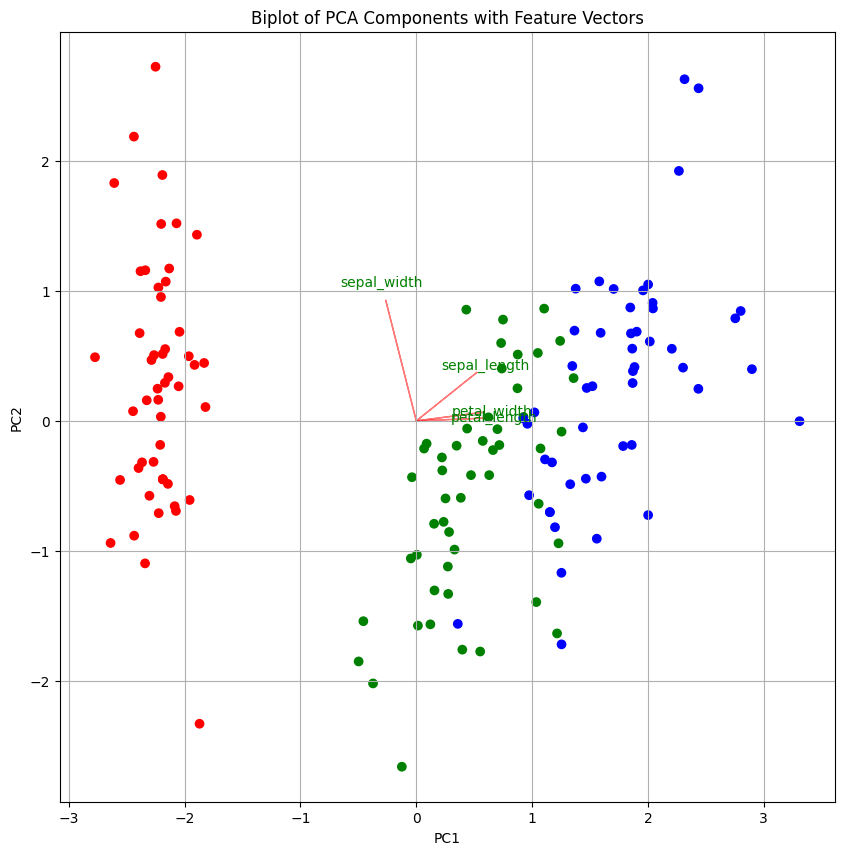

In [10]:
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    plt.scatter(xs, ys, c=y.map(colors))

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.figure(figsize=(10, 10))
biplot(x_pca, np.transpose(pca_model.components_), labels=df.columns[:4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of PCA Components with Feature Vectors')
plt.grid()
plt.show()


## Violin Plot of Principal Components

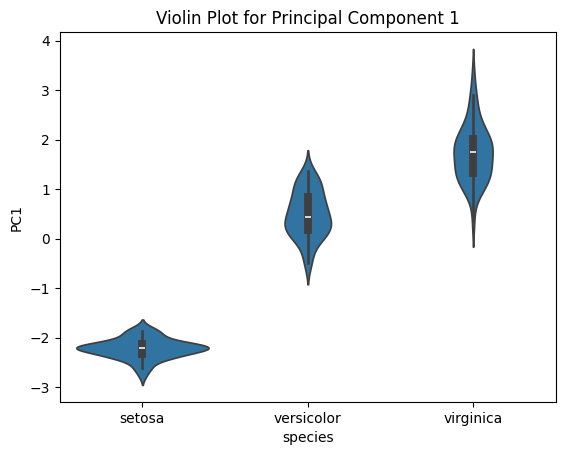

In [13]:
pca_df = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

sns.violinplot(x='species', y='PC1', data=pca_df)
plt.title('Violin Plot for Principal Component 1')
plt.show()


## Heatmap of the PCA Component Loadings

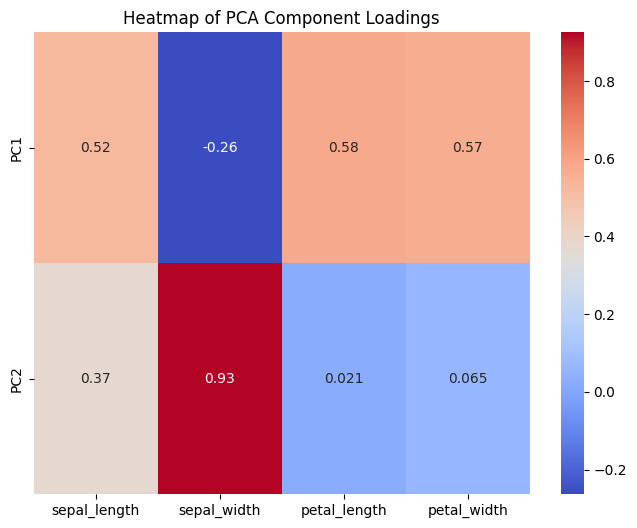

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(pca_model.components_, cmap='coolwarm', annot=True, 
            xticklabels=df.columns[:4], yticklabels=['PC1', 'PC2'])
plt.title('Heatmap of PCA Component Loadings')
plt.show()


## Scree Plot (Explained Variance Ratio)

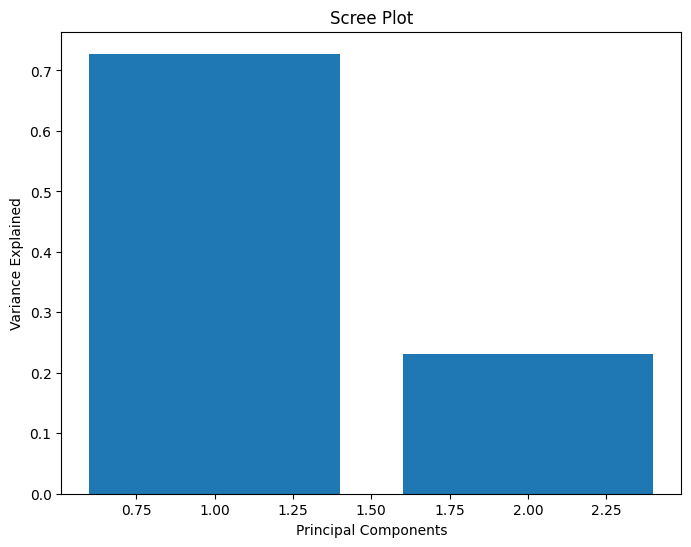

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca_model.explained_variance_ratio_)+1), pca_model.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()
